# KARNATKA

In [279]:
import pandas as pd

df_kn_enrolment = pd.read_csv('/content/Karnatka Enrolment State.csv')
df_kn_demographic = pd.read_csv('/content/Karnatka Demographic State.csv')
df_kn_biometric = pd.read_csv('/content/Karnatka Biometric State.csv')

print("Karnataka datasets loaded successfully.")

Karnataka datasets loaded successfully.


In [280]:
print("\nKarnataka Enrolment Dataset:")
print(df_kn_enrolment.head())
print(df_kn_enrolment.info())
print(df_kn_enrolment.describe())

print("\nKarnataka Demographic Dataset:")
print(df_kn_demographic.head())
print(df_kn_demographic.info())
print(df_kn_demographic.describe())

print("\nKarnataka Biometric Dataset:")
print(df_kn_biometric.head())
print(df_kn_biometric.info())
print(df_kn_biometric.describe())


Karnataka Enrolment Dataset:
         date      state  district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025  Karnataka  Bagalkot   587120        4         0               0
1  01-09-2025  Karnataka  Bagalkot   587122        4         1               0
2  01-09-2025  Karnataka  Bagalkot   587203        8         2               0
3  01-09-2025  Karnataka  Bagalkot   587205        2         0               0
4  01-09-2025  Karnataka  Bagalkot   587206        6         2               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            86772 non-null  object
 1   state           86772 non-null  object
 2   district        86772 non-null  object
 3   pincode         86772 non-null  int64 
 4   age_0_5         86772 non-null  int64 
 5   age_5_17        86772 non-null  int64 
 6   age_18_greater  86772 non-null 

In [281]:
df_kn_enrolment['date'] = pd.to_datetime(df_kn_enrolment['date'], format='%d-%m-%Y')
df_kn_demographic['date'] = pd.to_datetime(df_kn_demographic['date'], format='%d-%m-%Y')
df_kn_biometric['date'] = pd.to_datetime(df_kn_biometric['date'], format='%d-%m-%Y')

merged_kn_df_temp = pd.merge(df_kn_enrolment, df_kn_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_kn_merged = pd.merge(merged_kn_df_temp, df_kn_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_kn_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_kn_merged[numeric_cols] = df_kn_merged[numeric_cols].fillna(0)

print("Data types after date conversion for df_kn_enrolment:")
print(df_kn_enrolment.info())
print("\nData types after date conversion for df_kn_demographic:")
print(df_kn_demographic.info())
print("\nData types after date conversion for df_kn_biometric:")
print(df_kn_biometric.info())

print("\nMerged Karnataka DataFrame (df_kn_merged) head:")
print(df_kn_merged.head())
print("\nMerged Karnataka DataFrame (df_kn_merged) info:")
print(df_kn_merged.info())
print("\nMerged Karnataka DataFrame (df_kn_merged) describe:")
print(df_kn_merged.describe())

Data types after date conversion for df_kn_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86772 entries, 0 to 86771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            86772 non-null  datetime64[ns]
 1   state           86772 non-null  object        
 2   district        86772 non-null  object        
 3   pincode         86772 non-null  int64         
 4   age_0_5         86772 non-null  int64         
 5   age_5_17        86772 non-null  int64         
 6   age_18_greater  86772 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.6+ MB
None

Data types after date conversion for df_kn_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181401 entries, 0 to 181400
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           18140

In [282]:
import numpy as np

df_kn = df_kn_merged[df_kn_merged['state'] == 'Karnataka'].copy()
df_kn['year'] = df_kn['date'].dt.year
df_kn['month'] = df_kn['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_kn_agg = df_kn.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_kn_agg['totalenrolments'] = df_kn_agg['age_0_5'] + df_kn_agg['age_5_17'] + df_kn_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_kn_agg['childenrolments'] = df_kn_agg['age_0_5'] + df_kn_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_kn_agg['totaldemoupdates'] = df_kn_agg['demo_age_5_17'] + df_kn_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_kn_agg['totalbioupdates'] = df_kn_agg['bio_age_5_17'] + df_kn_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_kn_agg['CES'] = np.where(
    df_kn_agg['totalenrolments'] == 0,
    0,
    df_kn_agg['childenrolments'] / df_kn_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_kn_agg['DUR'] = np.where(
    df_kn_agg['totalenrolments'] == 0,
    0,
    df_kn_agg['totaldemoupdates'] / df_kn_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_kn_agg['BUR'] = np.where(
    df_kn_agg['totalenrolments'] == 0,
    0,
    df_kn_agg['totalbioupdates'] / df_kn_agg['totalenrolments']
)

print("Shape of df_kn:", df_kn.shape)
print("\nFirst 5 rows of df_kn with new 'year' and 'month' columns:")
print(df_kn.head())
print("\nAggregated DataFrame (df_kn_agg) head:")
print(df_kn_agg.head())
print("\nAggregated DataFrame (df_kn_agg) info:")
print(df_kn_agg.info())

Shape of df_kn: (522474, 13)

First 5 rows of df_kn with new 'year' and 'month' columns:
        date      state  district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Karnataka  Bagalkot   586113      0.0       0.0             0.0   
1 2025-03-01  Karnataka  Bagalkot   586113      0.0       0.0             0.0   
2 2025-03-01  Karnataka  Bagalkot   586125      0.0       0.0             0.0   
3 2025-03-01  Karnataka  Bagalkot   586125      0.0       0.0             0.0   
4 2025-03-01  Karnataka  Bagalkot   587101      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0            0.0           0.0          13.0         13.0  2025      3  
1            0.0           0.0          13.0         13.0  2025      3  
2           26.0          30.0           0.0          0.0  2025      3  
3           26.0          30.0           0.0          0.0  2025      3  
4            0.0           0.0         128.0         91.0  

In [283]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_kn_agg['Enorm'] = df_kn_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_kn_agg['Dnorm'] = df_kn_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_kn_agg['Bnorm'] = df_kn_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_kn_agg['stdnorm'] = (df_kn_agg['Enorm'] + df_kn_agg['Dnorm'] + df_kn_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_kn_agg['ALBI'] = 1 - df_kn_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_kn_agg['ALBI'] = df_kn_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_kn_agg) with normalized metrics and ALBI head:")
print(df_kn_agg.head())

Aggregated DataFrame (df_kn_agg) with normalized metrics and ALBI head:
   year  month      state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Karnataka         Bagalkot      0.0       0.0             0.0   
1  2025      3  Karnataka       Bagalkot *      0.0       0.0             0.0   
2  2025      3  Karnataka          Ballari      0.0       0.0             0.0   
3  2025      3  Karnataka        Bangalore      0.0       0.0             0.0   
4  2025      3  Karnataka  Bangalore Rural      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0         7204.0       10270.0        3596.0  ...           17474.0   
1           32.0         119.0          34.0  ...             151.0   
2          828.0        3195.0        1460.0  ...            4023.0   
3          830.0        9014.0        5277.0  ...            9844.0   
4         1006.0        8186.0        1488.0  ...            9192.0   

   totalbioupd

In [284]:
df_kn_agg['Enormrisk'] = 1 - df_kn_agg['Enorm']
df_kn_agg['CESrisknorm'] = 1 - df_kn_agg['CES']
df_kn_agg['DURrisknorm'] = 1 - df_kn_agg['DUR']
df_kn_agg['BURrisknorm'] = 1 - df_kn_agg['BUR']
df_kn_agg['ALBIrisknorm'] = 1 - df_kn_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_kn_agg['riskscore'] = (
    df_kn_agg['Enormrisk'] +
    df_kn_agg['CESrisknorm'] +
    df_kn_agg['DURrisknorm'] +
    df_kn_agg['BURrisknorm'] +
    df_kn_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_kn_agg) with risk components and riskscore head:")
print(df_kn_agg.head())

Aggregated DataFrame (df_kn_agg) with risk components and riskscore head:
   year  month      state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Karnataka         Bagalkot      0.0       0.0             0.0   
1  2025      3  Karnataka       Bagalkot *      0.0       0.0             0.0   
2  2025      3  Karnataka          Ballari      0.0       0.0             0.0   
3  2025      3  Karnataka        Bangalore      0.0       0.0             0.0   
4  2025      3  Karnataka  Bangalore Rural      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0         7204.0       10270.0        3596.0  ...  0.273057  0.124035   
1           32.0         119.0          34.0  ...  0.002360  0.002774   
2          828.0        3195.0        1460.0  ...  0.062865  0.042546   
3          830.0        9014.0        5277.0  ...  0.153827  0.433380   
4         1006.0        8186.0        1488.0  ...  0.143638  0.063643   



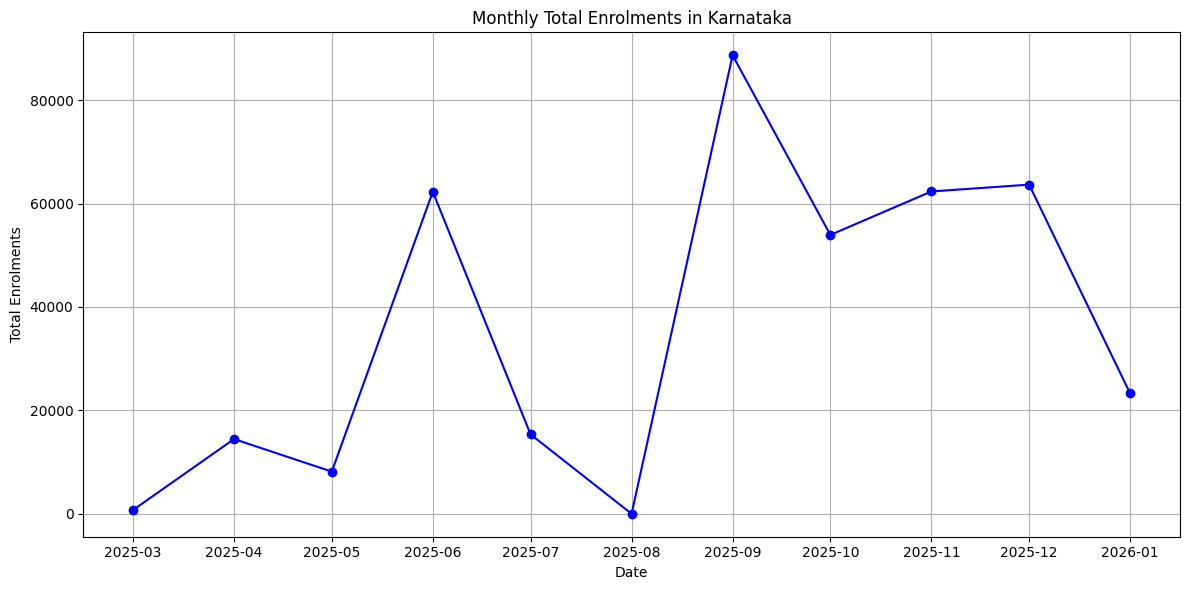

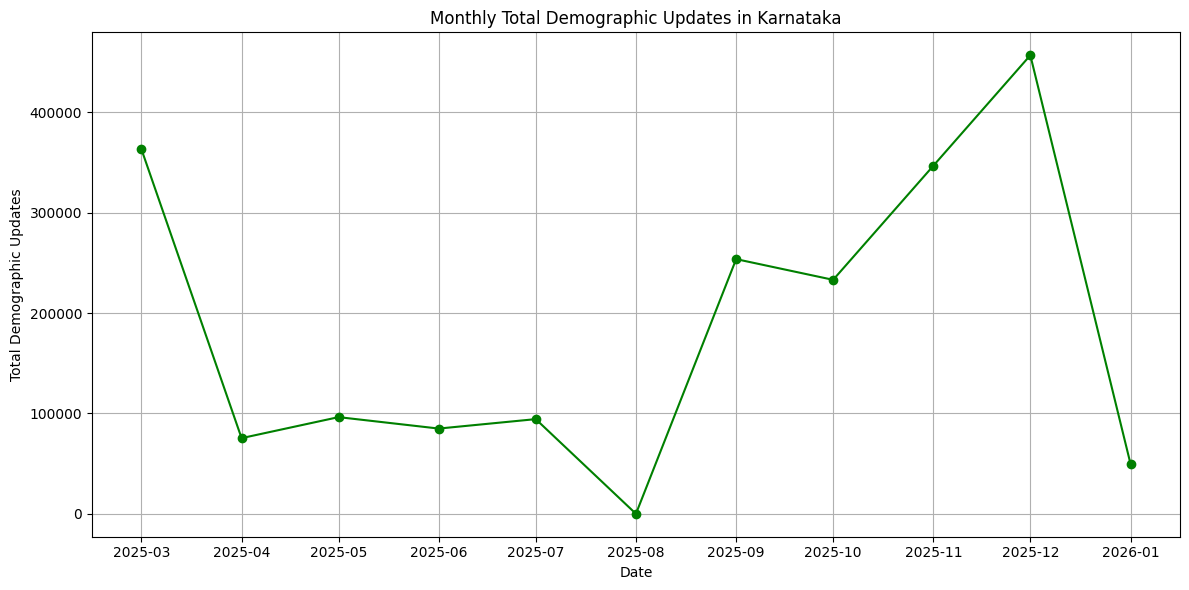

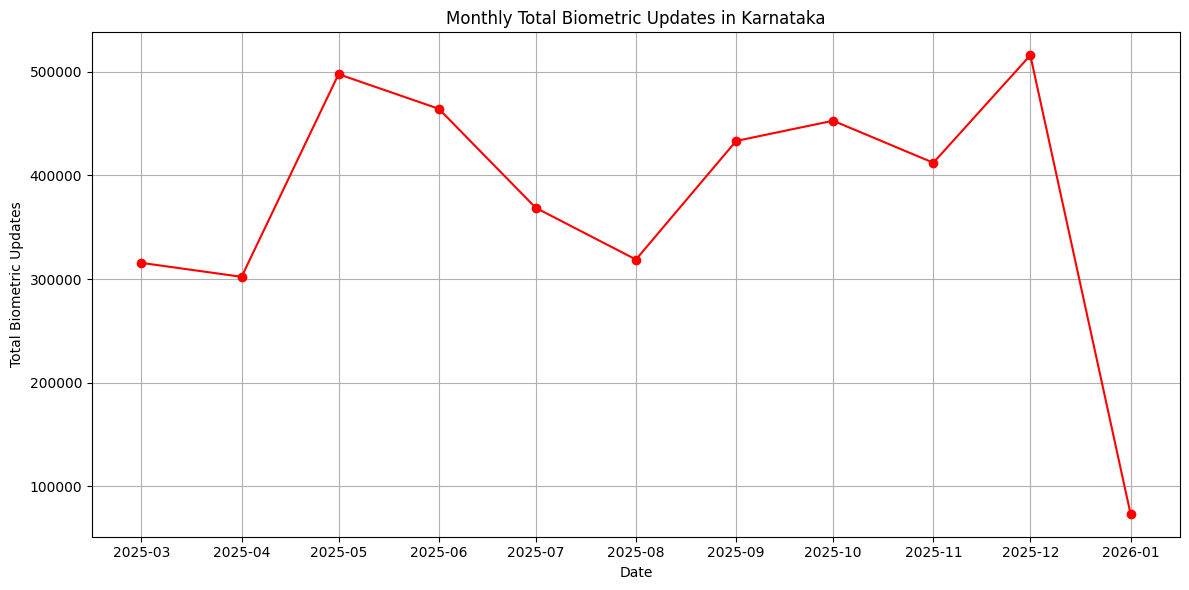

Monthly trend plots generated successfully for Karnataka.


In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

df_kn_monthly_trends = df_kn_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_kn_monthly_trends['date'] = pd.to_datetime(df_kn_monthly_trends['year'].astype(str) + '-' + df_kn_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_kn_monthly_trends = df_kn_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_kn_monthly_trends['date'], df_kn_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Karnataka')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_kn_monthly_trends['date'], df_kn_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Karnataka')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_kn_monthly_trends['date'], df_kn_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Karnataka')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Karnataka.")


**Univariate Analysis**

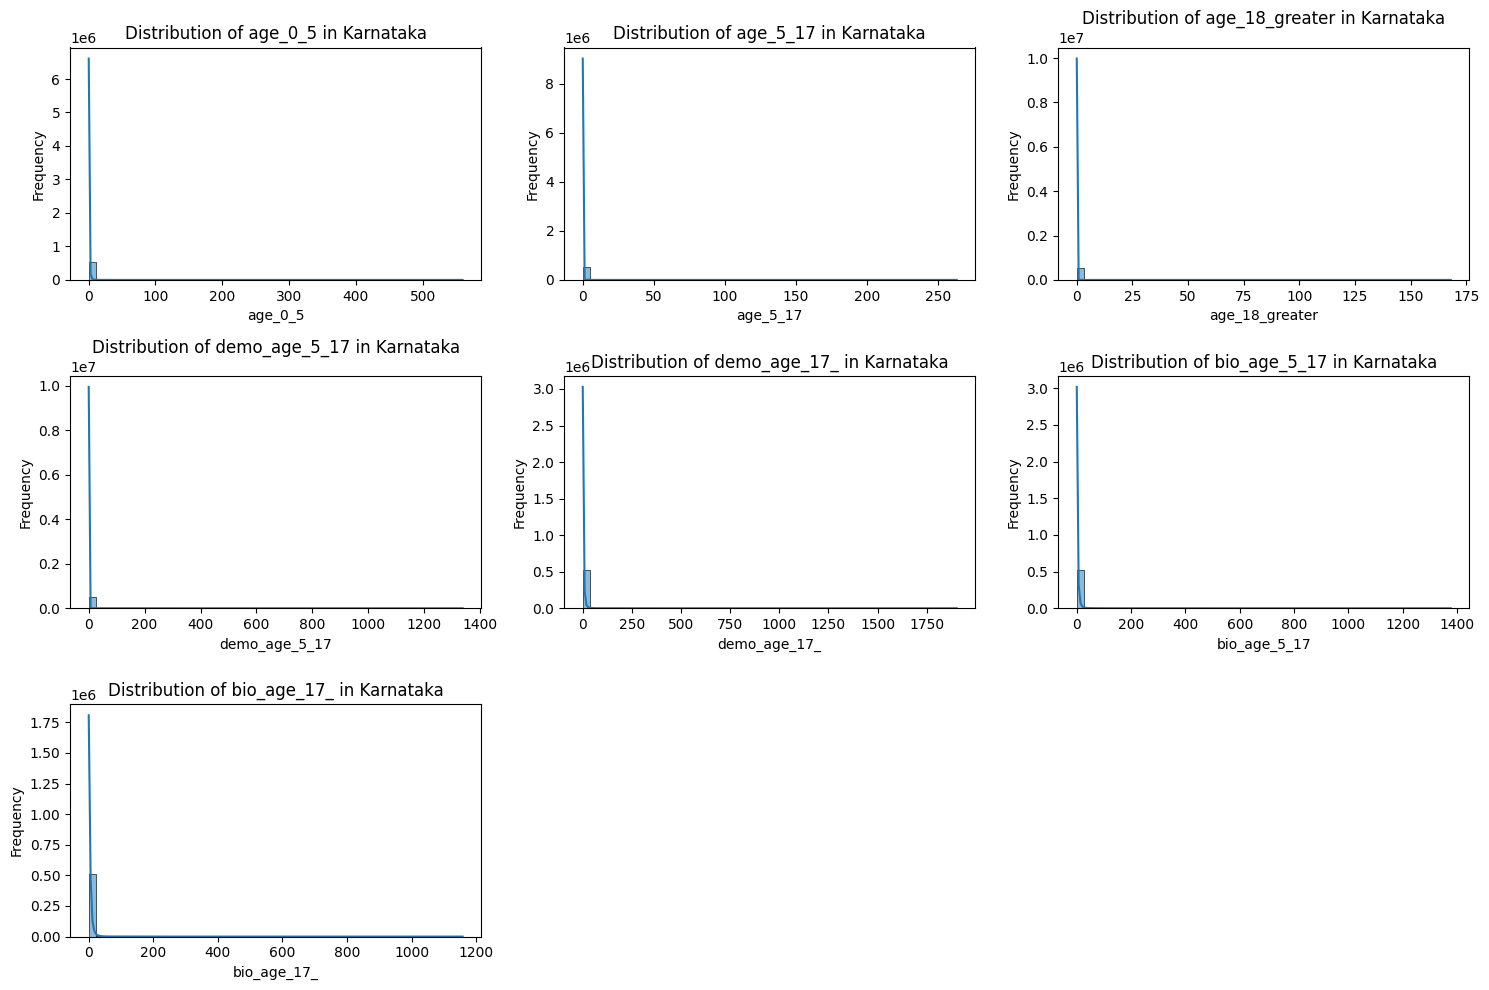

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_kn_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Karnataka')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

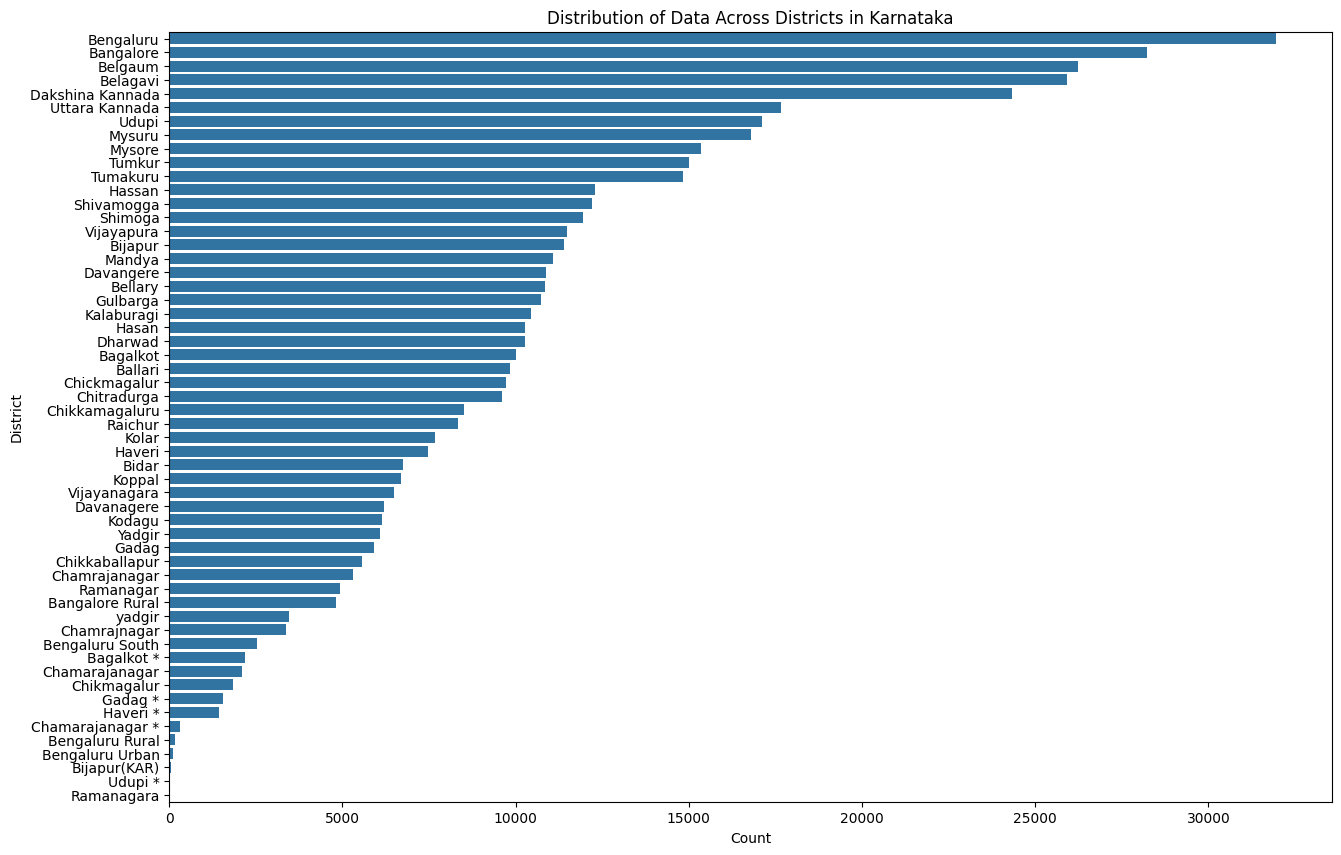

Histograms for numerical age-related columns and count plot for 'district' displayed for Karnataka.


In [287]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_kn_merged, y='district', order=df_kn_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Karnataka')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Karnataka.")

**Bivariate and Trivariate Analysis (Karnataka)**

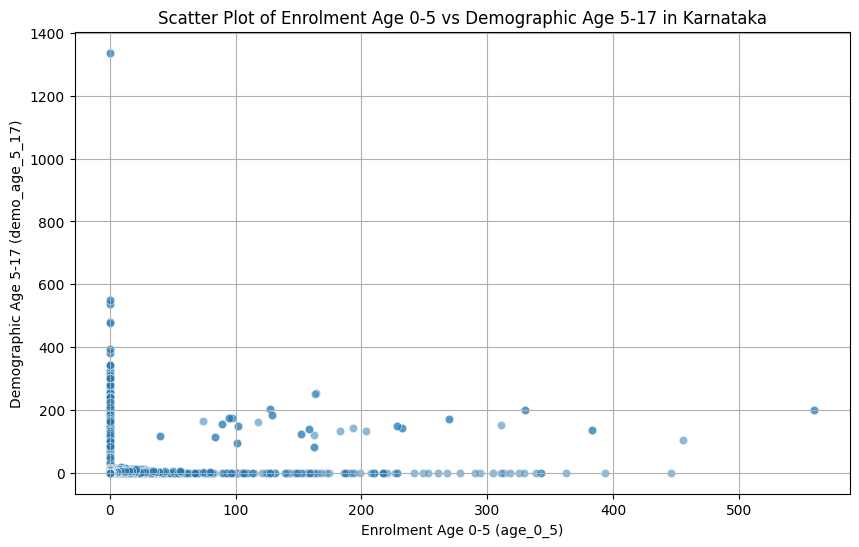

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Karnataka.


In [288]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kn_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Karnataka')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Karnataka.")

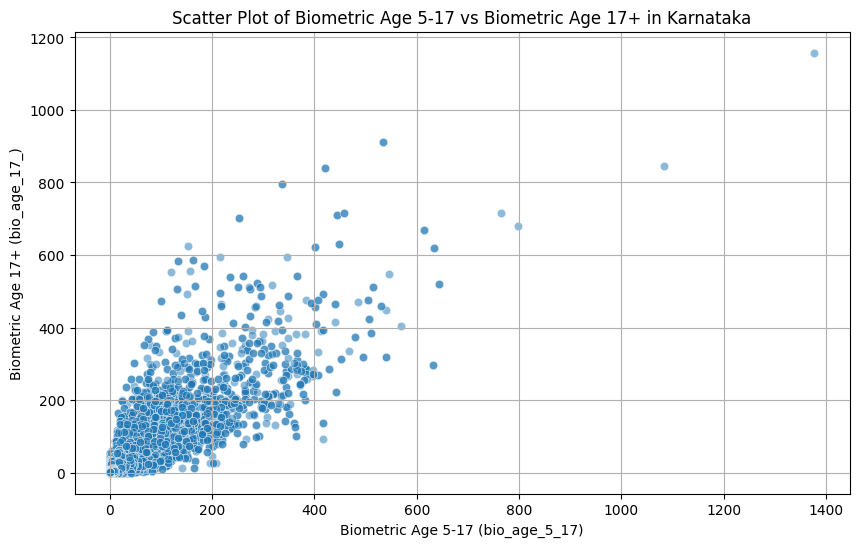

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Karnataka.


In [289]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kn_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Karnataka')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Karnataka.")

In [290]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_kn = df_kn_merged[numerical_age_cols].corr()

print("Correlation Matrix for Karnataka:")
print(correlation_matrix_kn)

Correlation Matrix for Karnataka:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.737268        0.612570       0.111064   
age_5_17        0.737268  1.000000        0.812915       0.077639   
age_18_greater  0.612570  0.812915        1.000000       0.074400   
demo_age_5_17   0.111064  0.077639        0.074400       1.000000   
demo_age_17_    0.176080  0.125513        0.121470       0.762251   
bio_age_5_17    0.137438  0.087177        0.091618       0.290502   
bio_age_17_     0.117138  0.071623        0.075147       0.251503   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.176080      0.137438     0.117138  
age_5_17            0.125513      0.087177     0.071623  
age_18_greater      0.121470      0.091618     0.075147  
demo_age_5_17       0.762251      0.290502     0.251503  
demo_age_17_        1.000000      0.316455     0.314518  
bio_age_5_17        0.316455      1.000000     0.842997  
bio_age

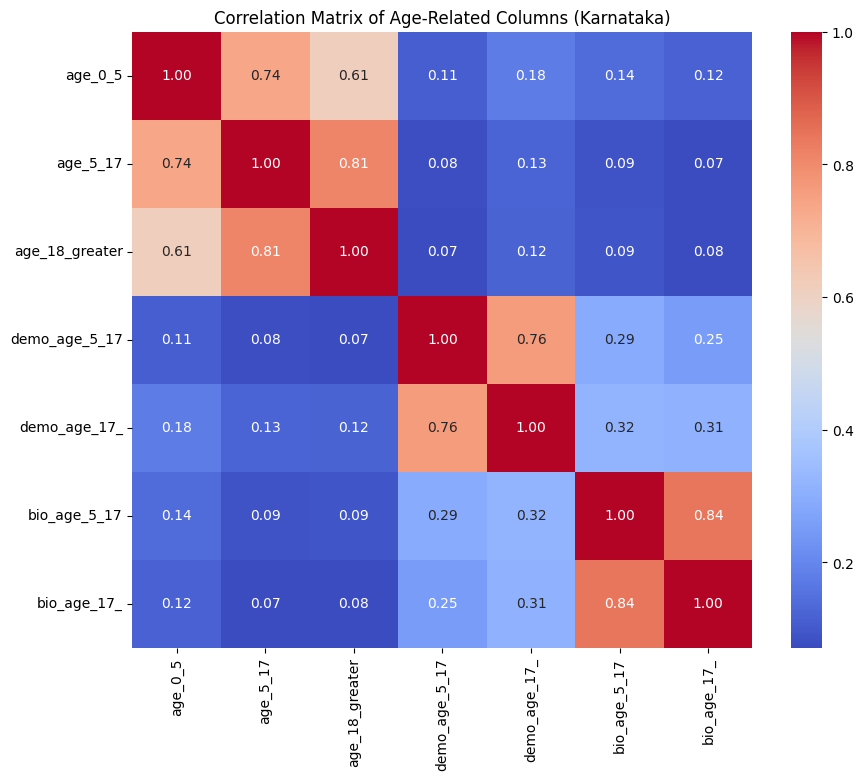

Correlation matrix heatmap for age-related columns displayed for Karnataka.


In [291]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kn, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Karnataka)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Karnataka.")

In [292]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_kn_district_mean = df_kn_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Karnataka:")
print(df_kn_district_mean.head())
print(df_kn_district_mean.info())

df_kn_district_mean['total_avg_age'] = df_kn_district_mean[age_cols_to_group].sum(axis=1)

District-wise average age-related data for Karnataka:
          district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0         Bagalkot  1.144558  0.201881        0.014106       1.703281   
1       Bagalkot *  0.152372  0.025547        0.000000       0.109945   
2          Ballari  0.451629  0.068724        0.012385       0.478936   
3        Bangalore  0.363978  0.099196        0.000496       0.152620   
4  Bangalore Rural  0.884959  0.114416        0.048679       1.154982   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      5.087735      5.334134     5.809624  
1      0.714872      0.367701     1.489051  
2      2.178459      3.808141     2.099178  
3      2.239168      2.337443     7.829596  
4      9.437279      5.521115     6.526316  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        56 non-null     object 


Top 10 districts by total average age-related counts for Karnataka:
           district  total_avg_age
11  Bengaluru Urban     237.876289
44       Ramanagara     204.000000
42          Raichur      30.059162
8         Bengaluru      27.585659
12            Bidar      26.664396
38           Koppal      24.300792
4   Bangalore Rural      23.687747
54           Yadgir      22.928970
43        Ramanagar      22.328125
33           Haveri      21.303395


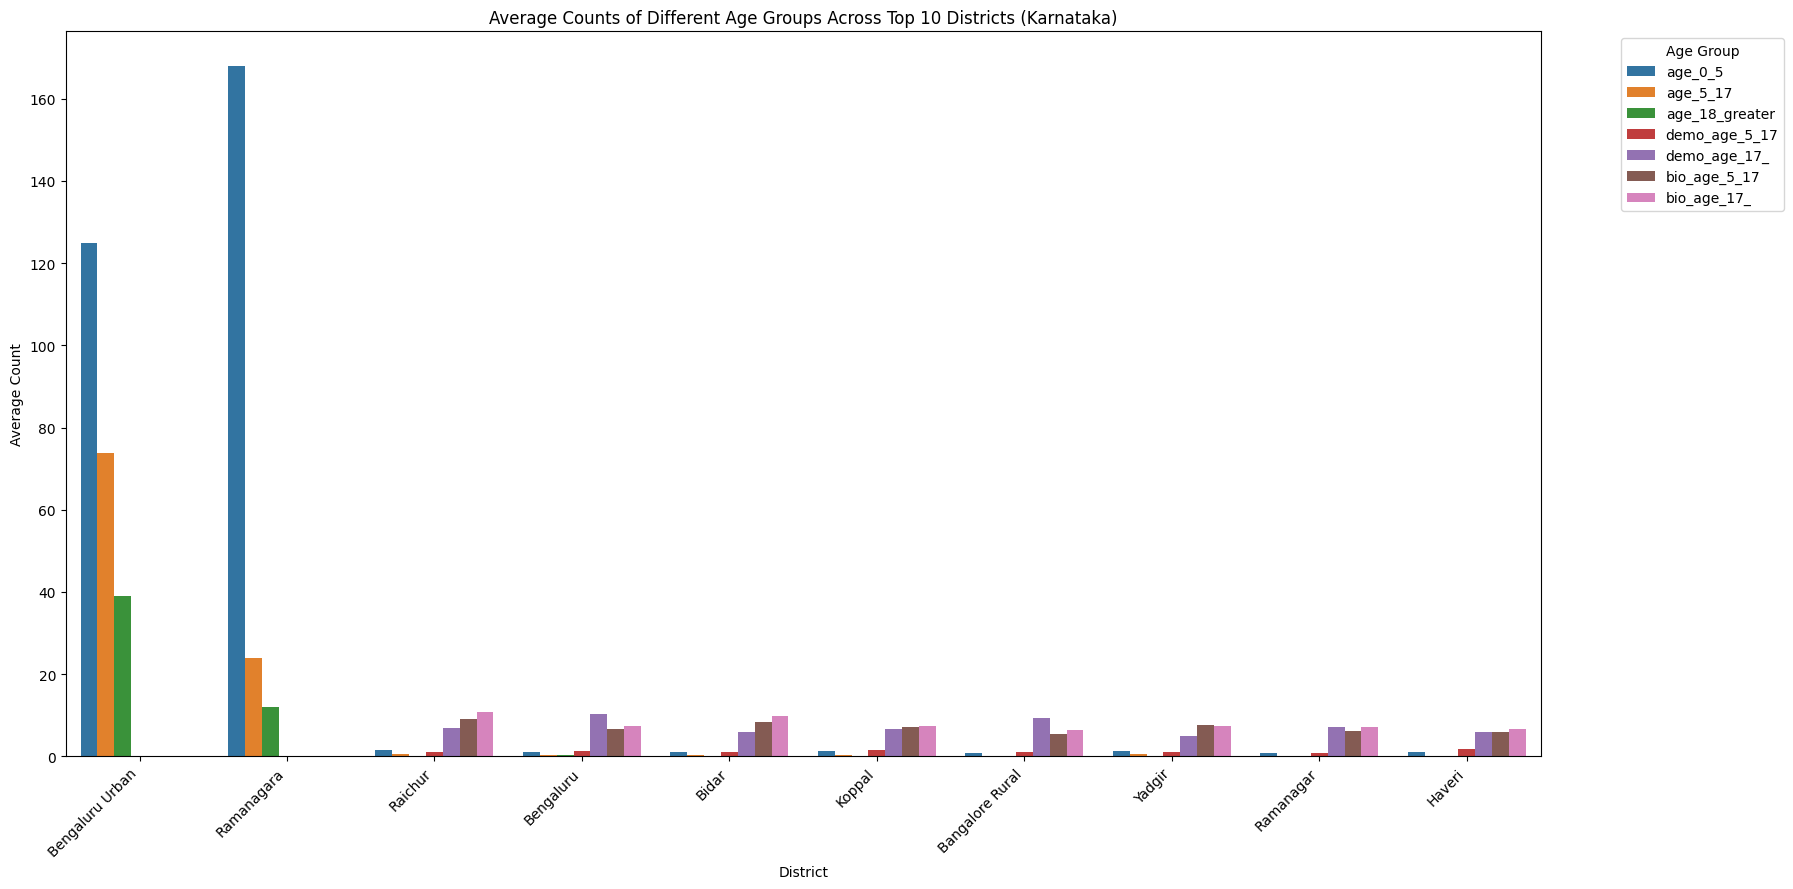

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Karnataka, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [293]:
df_kn_district_mean_top10 = df_kn_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Karnataka:")
print(df_kn_district_mean_top10[['district', 'total_avg_age']])

df_kn_district_mean_melted = df_kn_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_kn_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Karnataka)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Karnataka, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Karnataka:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        79266.0      284137.0   
1 2025-03-09     63.0      80.0           105.0            0.0           0.0   
2 2025-03-20    246.0     112.0           126.0            0.0           0.0   
3 2025-04-01  11084.0    1737.0          1633.0        11896.0       63476.0   
4 2025-05-01   4109.0    2668.0          1379.0        17285.0       79020.0   

   bio_age_5_17  bio_age_17_  
0      135509.0     180155.0  
1           0.0          0.0  
2           0.0          0.0  
3      139563.0     162630.0  
4      177777.0     161258.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            233 non-null    datetim

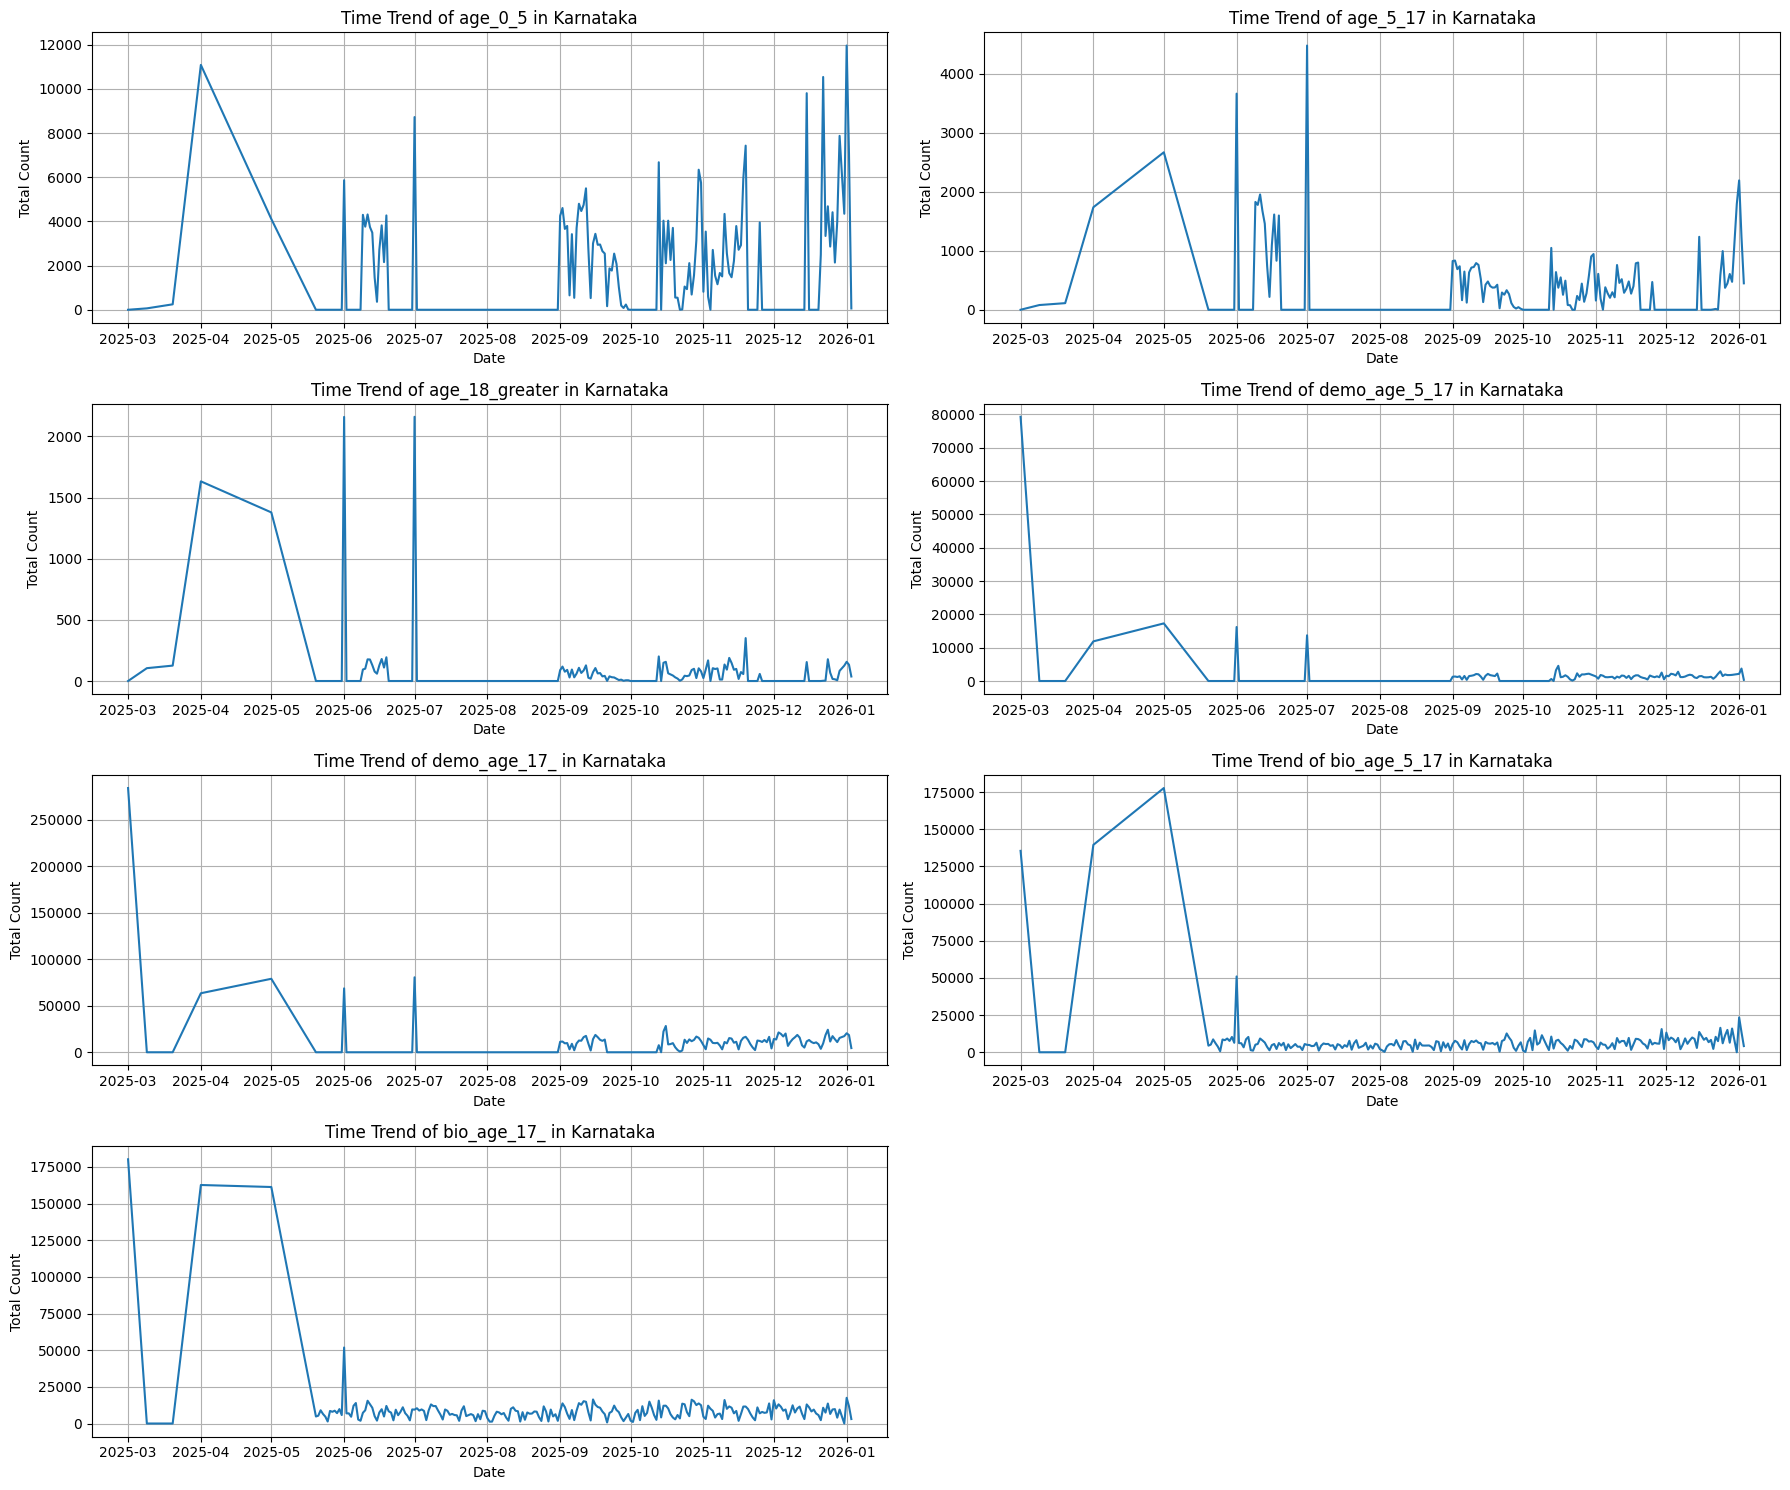

Insight: Line charts for each age-related column over time in Karnataka provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group df_kn_merged by date and sum the age-related columns
df_kn_time_trend = df_kn_merged.groupby('date')[age_cols_to_group].sum().reset_index()

# Sort by date to ensure proper trend plotting
df_kn_time_trend = df_kn_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Karnataka:")
print(df_kn_time_trend.head())
print(df_kn_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_kn_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Karnataka')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Karnataka provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

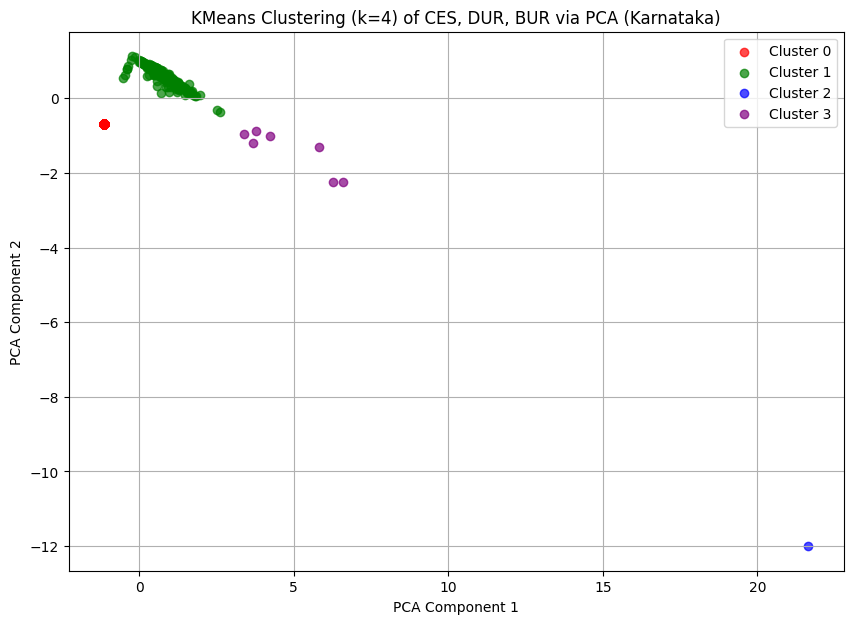

First 5 rows of df_kn_agg with 'clusterlabel' column:
   year  month      state         district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Karnataka         Bagalkot      0.0       0.0             0.0   
1  2025      3  Karnataka       Bagalkot *      0.0       0.0             0.0   
2  2025      3  Karnataka          Ballari      0.0       0.0             0.0   
3  2025      3  Karnataka        Bangalore      0.0       0.0             0.0   
4  2025      3  Karnataka  Bangalore Rural      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0         7204.0       10270.0        3596.0  ...  0.124035  0.132364   
1           32.0         119.0          34.0  ...  0.002774  0.001711   
2          828.0        3195.0        1460.0  ...  0.042546  0.035137   
3          830.0        9014.0        5277.0  ...  0.433380  0.195736   
4         1006.0        8186.0        1488.0  ...  0.063643  0.069094   

       ALBI  Enormri

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_kn_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_kn_agg
df_kn_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_kn_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Karnataka)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_kn_agg with 'clusterlabel' column:")
print(df_kn_agg.head())

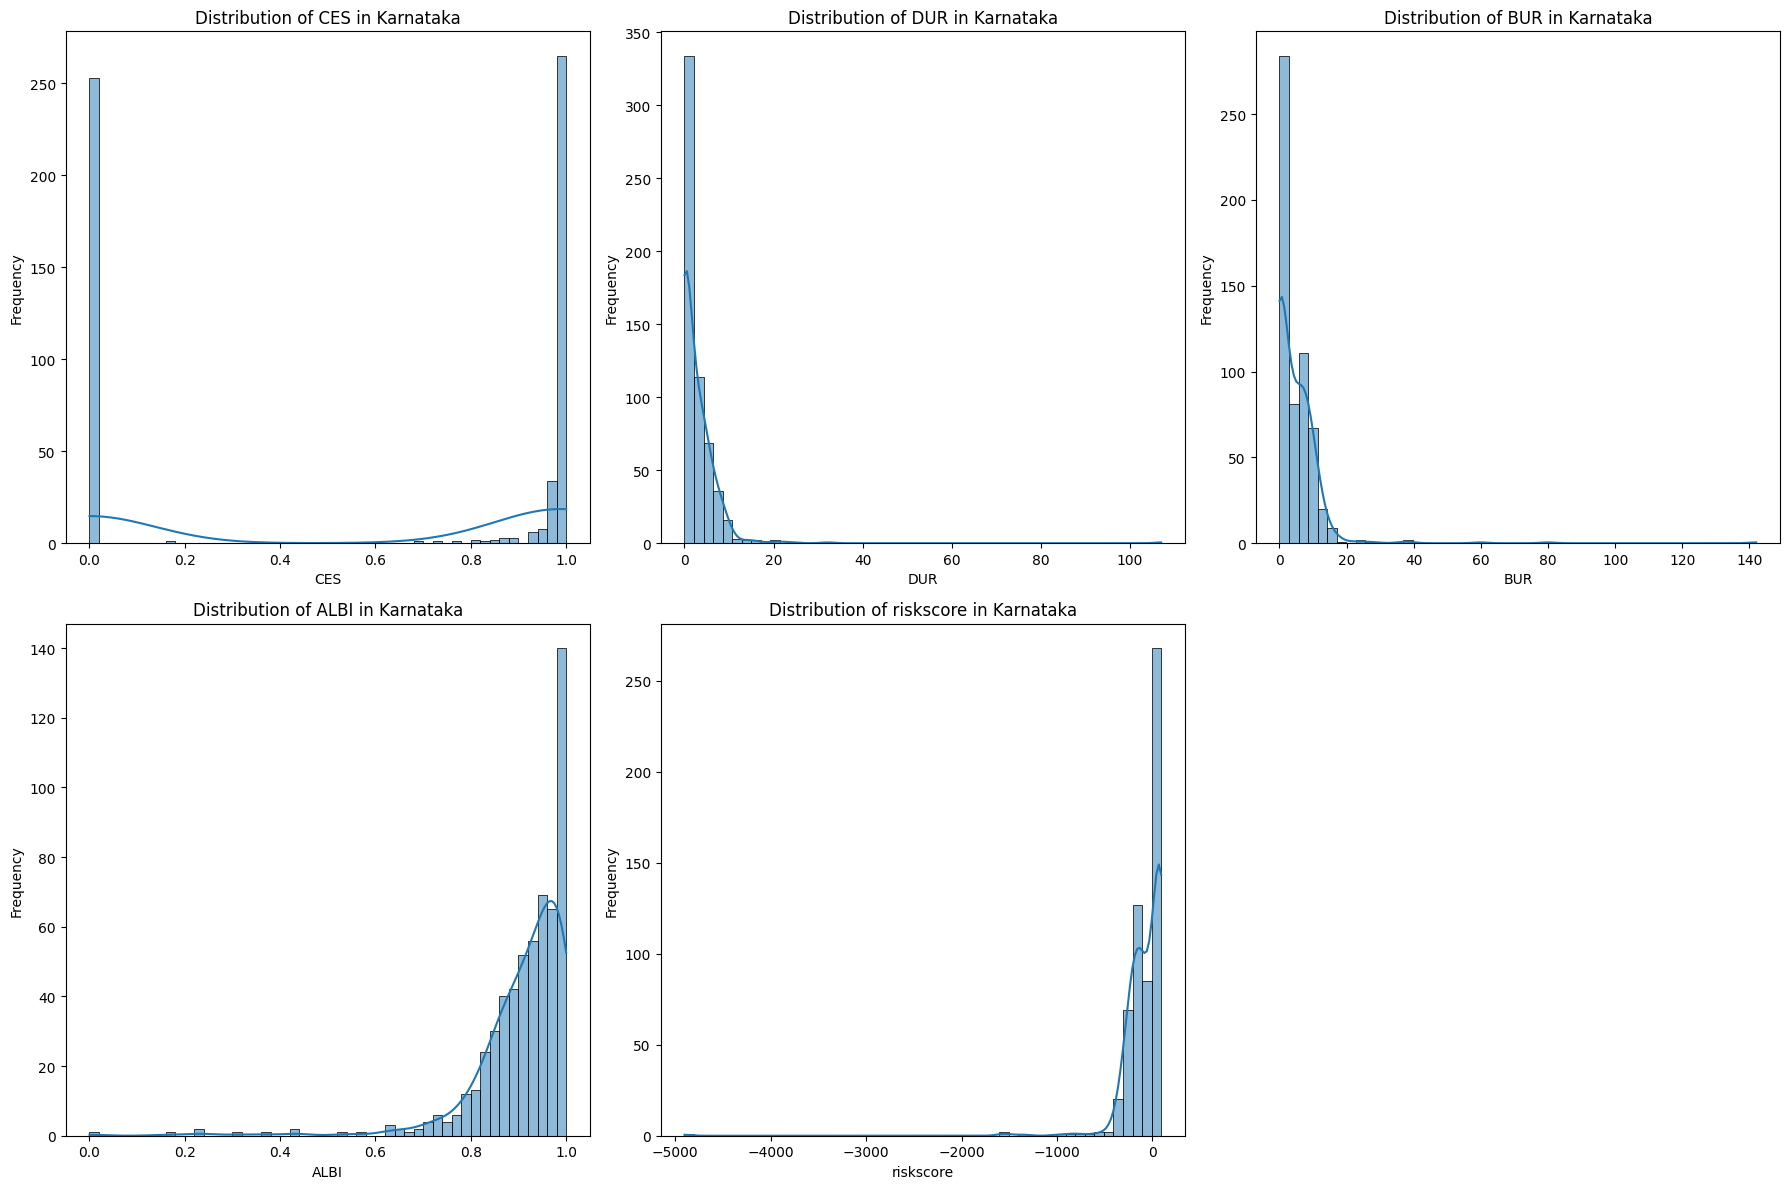

Histograms for CES, DUR, BUR, ALBI, and riskscore in Karnataka displayed.


In [296]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_kn_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Karnataka')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Karnataka displayed.")

In [297]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_kn_agg['year'].max()
latest_month = df_kn_agg[df_kn_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_kn_agg for the latest year and month
df_latest_month_kn = df_kn_agg[(df_kn_agg['year'] == latest_year) & (df_kn_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics_kn = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_kn:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month_kn.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month_kn.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
       district  CES
     Bagalkot *  1.0
      Bangalore  1.0
        Ballari  1.0
        Bijapur  1.0
        Belgaum  1.0
 Chikkaballapur  1.0
 Chikkamagaluru  1.0
Bengaluru South  1.0
Bengaluru Rural  1.0
   Chamrajnagar  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
        district      CES
Chamarajanagar * 0.000000
       Bengaluru 0.897792
 Bangalore Rural 0.973913
   Chamrajanagar 0.985294
          Kodagu 0.986301
           Bidar 0.989610
      Vijayapura 0.990411
        Tumakuru 0.990536
         Raichur 0.991180
    Vijayanagara 0.992754

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
        district       DUR
 Bengaluru South 12.500000
        Haveri *  4.500000
       Ramanagar  3.704861
   Chamrajanagar  3.551471
          Mysuru  3.533784
      Davanagere  3.377778
Dakshina Kannada  3.223421
    Chamrajnagar  2.961538
       Ben

## Summary:

### Q&A

1.  **Observations:**
    *   Karnataka's Aadhaar ecosystem exhibits varied performance across districts and over time.
    *   Monthly trends show fluctuations in total enrolments, demographic, and biometric updates.
    *   A strong positive correlation exists within enrolment age groups and within demographic/biometric update age categories, but weaker correlations between enrolment and update figures.
    *   Districts like Bagalkot, Bangalore, Ballari, Bijapur, and Belgaum show excellent Child Enrolment Scores (CES) of 1.0 in the latest period.
    *   Chamarajanagar shows significant variation across metrics, with a CES of 0.0 and a DUR/BUR of 0.0, but also one of the highest Aadhaar Lifecycle Balance Index (ALBI) at 0.9999.
    *   Bengaluru South (12.50) and Haveri (4.50) demonstrate the highest Demographic Update Rates (DUR).
    *   Haveri (7.625) and Mysuru (7.118) lead in Biometric Update Rates (BUR).

2.  **District Performance:**
    *   **High Performance (latest period):**
        *   **CES:** Bagalkot, Bangalore, Ballari, Bijapur, Belgaum (all 1.0).
        *   **DUR:** Bengaluru South (12.50), Haveri (4.50).
        *   **BUR:** Haveri (7.625), Mysuru (7.118).
        *   **ALBI:** Chamarajanagar (0.9999), Bijapur(KAR) (0.9997).
    *   **Low Performance (latest period):**
        *   **CES:** Chamarajanagar (0.0), Bengaluru (0.898).
        *   **DUR:** Chamarajanagar (0.0), Bengaluru Rural (0.0).
        *   **BUR:** Chamarajanagar (0.0), Vijayanagara (0.587).
        *   **ALBI:** Bengaluru (0.0), Belagavi (0.629).

3.  **Identified Anomalies:**
    *   **Negative Risk Scores:** Several districts, notably Bengaluru South (-208.25) and Haveri (-182.47), displayed significantly negative `riskscore` values. This suggests a fundamental issue with the metric's definition or calculation, as a risk score is typically expected to be non-negative.
    *   **Zero Enrolment/Update Rates:** Districts like Chamarajanagar showing 0.0 for CES, DUR, and BUR in the latest period could indicate reporting gaps, inactivity, or data anomalies that require further investigation.

4.  **Insights:**
    *   The creation of metrics like `CES`, `DUR`, `BUR`, and `ALBI` provides a robust framework for evaluating different facets of Aadhaar lifecycle management.
    *   Clustering analysis helps categorize districts with similar performance profiles, enabling tailored strategies for improvement.
    *   The `riskscore`, despite current calculation issues, aims to consolidate various risk factors into a single, actionable metric for prioritization.

5.  **Recommendations for Further Investigation or Intervention:**
    *   Re-evaluate and refine the `riskscore` calculation to ensure it produces meaningful and actionable positive values.
    *   Investigate districts with zero enrolment or update rates (e.g., Chamarajanagar for CES, DUR, BUR) to understand if this indicates actual inactivity, data reporting issues, or specific local conditions.
    *   Focus intervention efforts on districts identified with low `DUR` or `BUR` to improve the quality and recency of demographic and biometric data.

### Data Analysis Key Findings

*   **Data Integration and Feature Engineering:** Three separate datasets for enrolment, demographic, and biometric updates were successfully merged and preprocessed. Key metrics like `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated.
*   **Performance Metrics Calculation:** Normalized metrics including `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), `BUR` (Biometric Update Rate), and `ALBI` (Aadhaar Lifecycle Balance Index) were computed for each district and month, with `ALBI` values clipped between 0 and 1.
*   **Risk Score Development:** A comprehensive `riskscore` (scaled 0-100) was calculated by averaging five risk-normalized components (`Enormrisk`, `CESrisknorm`, `DURrisknorm`, `BURrisknorm`, `ALBIrisknorm`).
*   **Temporal Trends:** Monthly trends for enrolments, demographic, and biometric updates revealed fluctuating activity levels across Karnataka.
*   **District-wise Performance (Latest Period: Year 2026, Month 1):**
    *   Top districts for `CES` (e.g., Bagalkot, Bangalore, Ballari, Bijapur, Belgaum) achieved a perfect score of 1.0.
    *   Top districts for `DUR` were Bengaluru South (12.50) and Haveri (4.50).
    *   Top districts for `BUR` were Haveri (7.625) and Mysuru (7.118).
    *   Chamarajanagar (0.9999) and Bijapur(KAR) (0.9997) had the highest `ALBI`.
    *   Significant anomalies were observed in the `riskscore`, with several districts like Bengaluru South (-208.25) and Haveri (-182.47) showing negative values.
*   **Correlation Analysis:** A strong positive correlation was observed between age groups within enrolment, demographic updates, and biometric updates respectively. However, correlations between enrolment figures and update figures were generally weaker.
*   **Clustering Analysis:** KMeans clustering successfully grouped districts into four distinct clusters based on `CES`, `DUR`, and `BUR` metrics, visualized using PCA. This segmentation can help identify districts with similar operational characteristics.

### Insights or Next Steps

*   **Refine Risk Score Methodology:** The observed negative `riskscore` values indicate a need to revise its calculation to ensure it accurately reflects risk and provides actionable insights, as negative risk is counter-intuitive.
*   **Targeted Interventions:** Utilize the `CES`, `DUR`, `BUR`, `ALBI`, and clustering results to identify districts requiring focused interventions for improving child enrolments, demographic updates, or biometric updates, thereby enhancing overall Aadhaar lifecycle management and data quality.
